#### Name: Kaung Khant Lin
#### ID: 6540131

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [3]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

In [4]:
# Load the CSV file
file_path = "ad_conversion.csv"
ad_conversion = pd.read_csv(file_path)

# Display the first few rows
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


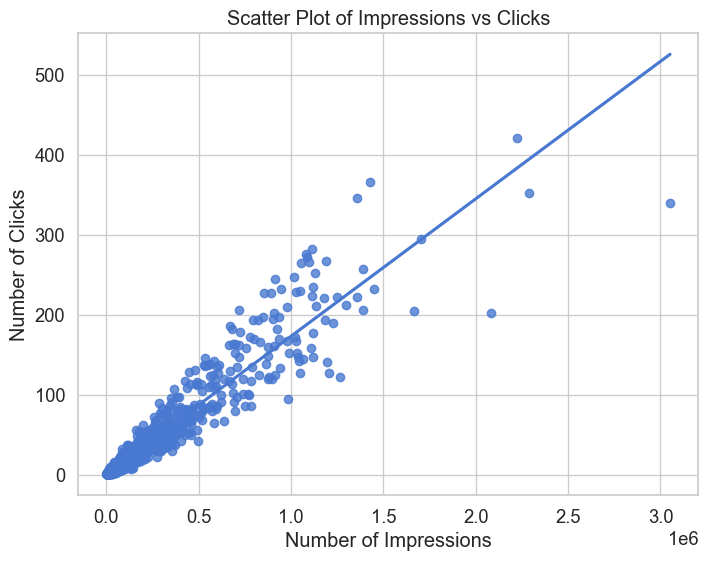

In [5]:
plt.figure(figsize=(8, 6))
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
plt.xlabel("Number of Impressions")
plt.ylabel("Number of Clicks")
plt.title("Scatter Plot of Impressions vs Clicks")
plt.show()

In [6]:
# Apply transformations
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

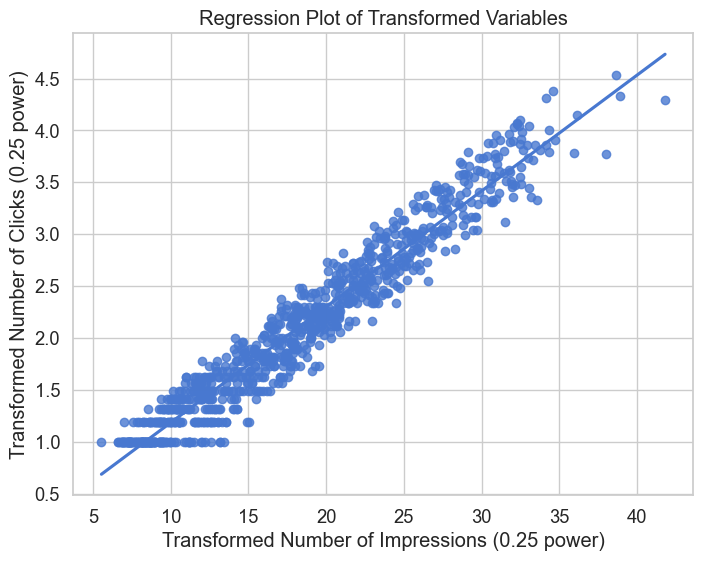

In [7]:
plt.figure(figsize=(8, 6))
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
plt.xlabel("Transformed Number of Impressions (0.25 power)")
plt.ylabel("Transformed Number of Clicks (0.25 power)")
plt.title("Regression Plot of Transformed Variables")
plt.show()

In [8]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

# Print model parameters
mdl_click_vs_impression.params

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696


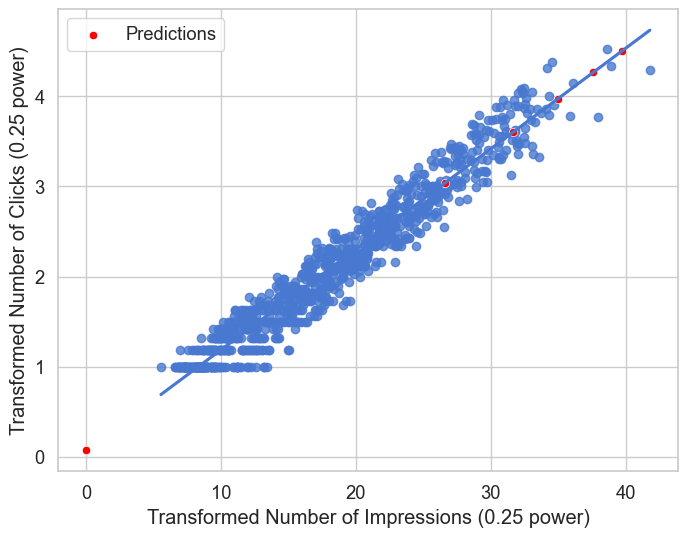

In [9]:
# Generate Explanatory Data for Predictions
prediction_data = pd.DataFrame({
    "qdrt_n_impressions": np.arange(0, 3000000, 500000) ** 0.25,
    "n_impressions": np.arange(0, 3000000, 500000)  # Keep this as a reference (no power transformation)
})

# Predict qdrt_n_clicks and assign it to prediction_data
prediction_data["qdrt_n_clicks"] = mdl_click_vs_impression.predict(prediction_data)

# Print the prediction data
print(prediction_data)

# Use transformed x-axis (qdrt_n_impressions)
plt.figure(figsize=(8, 6))
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red", label="Predictions")
plt.xlabel("Transformed Number of Impressions (0.25 power)")
plt.ylabel("Transformed Number of Clicks (0.25 power)")
plt.legend()
plt.show()

In [10]:
# Back-transform to get actual n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

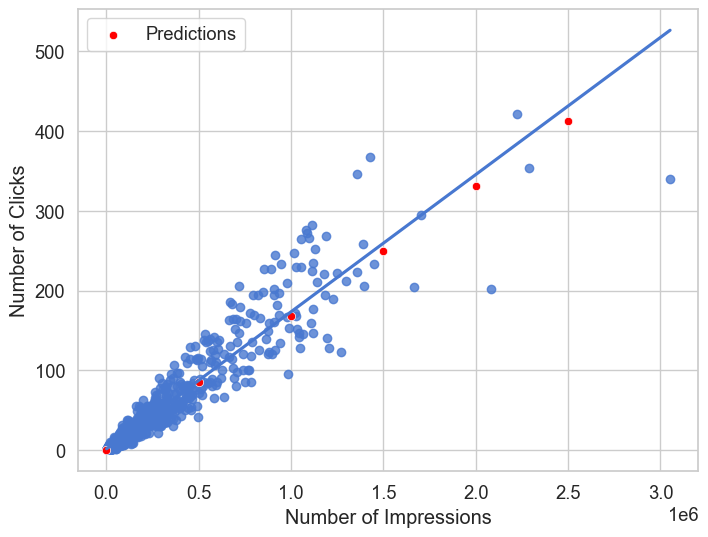

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
sns.scatterplot(x="n_impressions", y="n_clicks", data=prediction_data, color="red", label="Predictions")
plt.xlabel("Number of Impressions")
plt.ylabel("Number of Clicks")
plt.legend()
plt.show()

#### Name: Kaung Khant Lin
#### ID: 6540131